# 猫狗识别 

In [1]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential   # 顺序模型
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D  # 全连接层，2D卷积层
import tensorflow as tf

In [2]:
train_dataset=image_dataset_from_directory("cat-vs-dog-imgs/train/",batch_size=20,image_size=(256,256),labels="inferred")
test_dataset=image_dataset_from_directory("cat-vs-dog-imgs/test/",batch_size=20,image_size=(256,256),labels="inferred")

Found 6000 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [3]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
def get_model_cnn():
    
    model = Sequential()
    
    model.add(Rescaling(scale=1./255.,input_shape=(256, 256,3)))  
    
    # 增加卷积层, 卷积核20个，大小3*3， 输入图片是28*28 非线性处理relu
    model.add(Conv2D(filters=50, kernel_size=(3, 3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
        
    # 池化层：最大池化：2*2
    model.add(MaxPool2D(pool_size = (2,2)))
    
    # 展开到一维
    model.add(Flatten())
    
    # 全连接层，128节点
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    
    # 输出层，10节点
    model.add(Dense(1, activation = 'sigmoid'))
    
    # 编译：随机梯度下降学习率0.1，损失函数分类交叉熵
    model.compile(optimizer = "adam",
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    return model          

In [15]:
# 生成模型
cnn_model = get_model_cnn()
cnn_model.summary()

# 训练模型：手动设置validation_data，观察loss和accuracy
hs_cnn = cnn_model.fit(train_dataset, 
              batch_size = 20, epochs = 10, 
              validation_data = (test_dataset)
             )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 50)      1400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 50)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 819200)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               104857728 
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [16]:
# 绘制训练 & 验证的损失值  
# 模型每一步迭代的训练误差和测试误差，都保存在history里。
def plot_loss(hs):
    plt.figure(figsize = (8,4))
    plt.plot(hs.history['loss'], label = 'Train')  
    plt.plot(hs.history['val_loss'],label = 'test')  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(loc=0)  # loc=0 表示最优位置，自动。也可以手动设置，如：'upper left'等
    plt.show()
    return

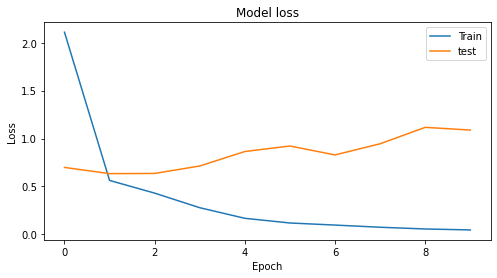

In [17]:
plot_loss(hs_cnn)

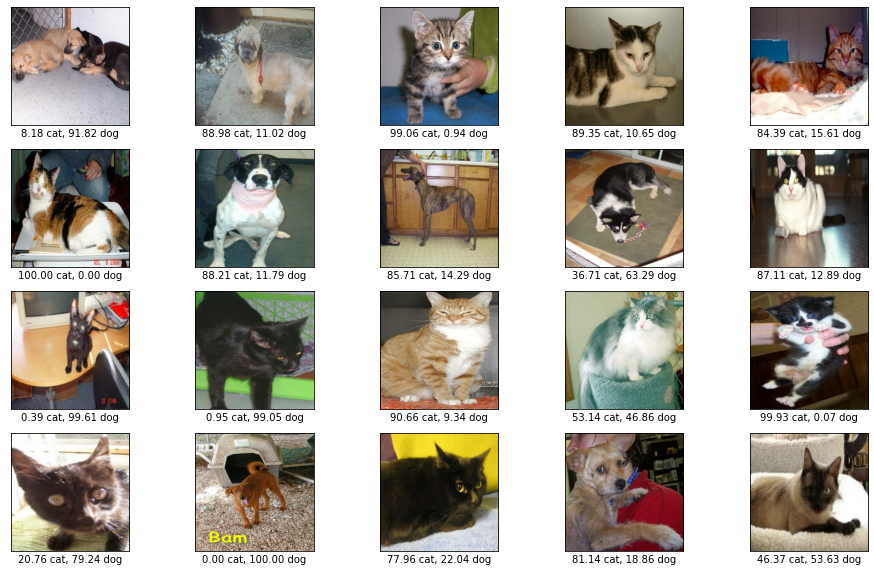

In [21]:
plt.figure(figsize=(16,10))
for images, labels in test_dataset.take(1):
    result = cnn_model.predict(images)
    for i in range(20):
        plt.subplot(4,5,i+1)   # 表示一共画2行10列，从第1个子图开始画
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("int"))
        plt.xlabel("%.2f cat, %.2f dog" % (100 * (1 - result[i]), 100 * result[i]))  
    plt.show()

## 测试 

In [5]:
from tensorflow.keras.models import load_model  

# 保存模型 ,生成模型文件 'my_model.h5'  
#cnn_model.save('cnn_model.h5')  
# 加载模型  
cnn_model = load_model('cnn_model.h5')

In [12]:
for labels in train_dataset:
      print(labels[1].numpy())

[[0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1]
 [0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1]
 [0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1]
 [1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1]
 [0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0]
 [0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1]
 [1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1]
 [1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0]
 [1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1]
 [0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1]
 [0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1]
 [1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0]
 [1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1]
 [1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1]]
[[0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0]
 [0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1]
 [1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1]
 [0 0 1 1 

[[0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0]
 [1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1]
 [1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0]
 [1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0]
 [1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1]
 [1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]
 [0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1]
 [0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0]
 [1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0]
 [0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1]
 [0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0]
 [1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0]]
[[1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 

In [24]:
for images, labels in train_dataset:
    for i in range(20):
        print(labels[i].numpy())

1
0
0
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0


KeyboardInterrupt: 

In [ ]:
dataset_batch = test_dataset.batch(batch_size=10)
it = dataset_batch.__iter__()
x, y = it.next()
print(y)
a=y.numpy()

In [41]:
a.flatten()
print(a)

[[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1]
 [1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1]
 [1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]
 [1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
 [1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0]
 [0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0]
 [0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1]
 [0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0]
 [1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0]
 [0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0]
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0]
 [0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1]
 [0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1]
 [1 1 1 1 0

In [42]:
from sklearn.metrics import classification_report #显示分类报告
train_pred_class = cnn_model.predict(train_dataset)

In [32]:
train_pred_class

array([[9.0462410e-01, 9.5375888e-02],
       [3.6318124e-07, 9.9999964e-01],
       [8.6264157e-01, 1.3735838e-01],
       ...,
       [1.5291443e-17, 1.0000000e+00],
       [3.8429795e-04, 9.9961567e-01],
       [8.4263819e-01, 1.5736178e-01]], dtype=float32)

In [33]:
train_pred_class = np.argmax(train_pred_class, axis = 1)
print('前30个test样本的预测值为： ',train_pred_class[:30])

前30个test样本的预测值为：  [0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0]


In [36]:
print("train上的分类报告如下：\n",classification_report(a,train_pred_class))

ValueError: Found input variables with inconsistent numbers of samples: [30, 6000]

# LeNet-5 

In [26]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist  # MNIST手写体数据集
from tensorflow.keras import Sequential   # 顺序模型
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D  # 全连接层，2D卷积层
from tensorflow.keras.optimizers import SGD

In [19]:
# 读取mnist数据集
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # 数据加载

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [20]:
x_train_4d = x_train.reshape(x_train.shape[0],28,28,1)  # 整形后的4维数据 x_train_4d
x_test_4d = x_test.reshape(x_test.shape[0],28,28,1)    # 整形后的4维数据  x_test_4d
print(x_train_4d.shape, x_test_4d.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def get_model_cnn():
    
    model = Sequential()

    model.add(Rescaling(scale=1./255.,input_shape=(28, 28,1))) 
    model.add(Conv2D(filters=6, kernel_size=(5,5),activation = 'relu'))
    
    # 池化层：最大池化：2*2
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters=16, kernel_size=(5,5),activation = 'relu'))
    
    # 池化层：最大池化：2*2
    model.add(MaxPool2D(pool_size = (2,2)))
    
    # 展开到一维
    model.add(Flatten())
    
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(84, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    # 编译：随机梯度下降学习率0.1，损失函数分类交叉熵
    model.compile(optimizer = SGD(learning_rate=0.1),
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model          

In [27]:
# 生成模型
cnn_model = get_model_cnn()
cnn_model.summary()

# 训练模型：手动设置validation_data，观察loss和accuracy
hs_cnn = cnn_model.fit(x_train_4d, y_train, 
              batch_size = 20, epochs = 10, 
              validation_data = (x_test_4d, y_test)
             )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [28]:
def plot_loss(hs):
    plt.figure(figsize = (8,4))
    plt.plot(hs.history['loss'], label = 'Train')  
    plt.plot(hs.history['val_loss'],label = 'test')  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(loc=0)  # loc=0 表示最优位置，自动。也可以手动设置，如：'upper left'等
    plt.show()
    return

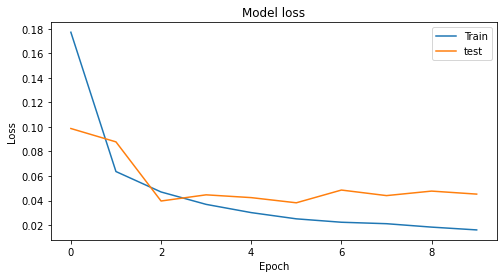

In [29]:
plot_loss(hs_cnn)

# 总结

In [31]:
#通过image_dataset_from_directory导入数据后为一个tf.data.dataset数据集 查看分类报告需要提取其中的标签